# Phase classification using CNN 

In [1]:
import numpy as np

In [2]:
import keras

In [3]:
import cv2
import os
from PIL import Image

In [4]:
import tensorflow as ts

In [5]:
from matplotlib import pyplot as plt

In [6]:
import pandas as pd

In [7]:
np.random.seed(1000)

In [8]:
import numpy as np

In [9]:
os.environ['KERAS_BACKEND']='tensorflow'

# Preparing Image Data for Training 

In [10]:
image_directory=(r'C:\Users\cm20470\Anu_python/')

In [11]:
SIZE=64

In [12]:
dataset=[]
label=[]

# Folder's path for Phase seperated images

In [13]:
Pseparated_images=os.listdir(image_directory + 'Pseparated_new_aug/')

In [14]:
Pseparated_images

['aug_0_5016.png',
 'aug_0_7151.png',
 'aug_0_8567.png',
 'aug_10_158.png',
 'aug_10_6178.png',
 'aug_10_6800.png',
 'aug_11_1159.png',
 'aug_11_1844.png',
 'aug_11_5589.png',
 'aug_12_2088.png',
 'aug_12_240.png',
 'aug_12_5424.png',
 'aug_12_7653.png',
 'aug_13_3203.png',
 'aug_13_38.png',
 'aug_13_6356.png',
 'aug_14_3009.png',
 'aug_14_306.png',
 'aug_14_4621.png',
 'aug_14_8808.png',
 'aug_15_1400.png',
 'aug_15_174.png',
 'aug_15_5588.png',
 'aug_15_7170.png',
 'aug_16_2108.png',
 'aug_16_5711.png',
 'aug_16_9868.png',
 'aug_17_249.png',
 'aug_17_4290.png',
 'aug_17_5439.png',
 'aug_17_7318.png',
 'aug_18_3691.png',
 'aug_18_443.png',
 'aug_18_5897.png',
 'aug_19_376.png',
 'aug_19_5139.png',
 'aug_19_9729.png',
 'aug_1_1736.png',
 'aug_1_3739.png',
 'aug_1_6635.png',
 'aug_20_2268.png',
 'aug_20_5600.png',
 'aug_20_7786.png',
 'aug_21_7768.png',
 'aug_21_8798.png',
 'aug_21_9771.png',
 'aug_22_3753.png',
 'aug_22_8471.png',
 'aug_22_9823.png',
 'aug_23_2649.png',
 'aug_23_5426.p

In [15]:
for i, image_name in enumerate(Pseparated_images):
    if (image_name.split('.')[1]=='png'):
        image=cv2.imread(image_directory + 'Pseparated_new_aug/' + image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((SIZE,SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [16]:
len(dataset)


80

#  Folder's path for Non Phase seperated images

In [17]:
Dispersed_images=os.listdir(image_directory + 'Dispersed/')

#  Reading the data from folder 

In [18]:
for i, image_name in enumerate(Dispersed_images):
    if (image_name.split('.')[1]=='png'):
        image=cv2.imread(image_directory + 'Dispersed/' + image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((SIZE,SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [19]:
INPUT_SHAPE=(SIZE,SIZE,3)
#Size can be changed from here, simple way

# CNN model, Building the layers

In [20]:
inp=keras.layers.Input(shape=INPUT_SHAPE)


In [21]:
#1st convolutional layer
conv1=keras.layers.Conv2D(32,kernel_size=(3,3),
                          activation='relu',
                          padding='same')(inp)

In [22]:
pool1=keras.layers.MaxPooling2D(pool_size=(2,2))(conv1) #maxpooling 
norm1=keras.layers.BatchNormalization(axis=-1)(pool1)   #normalize 
drop1=keras.layers.Dropout(rate=0.2)(norm1)             #Dropout the insignificant neurons

In [23]:
#Convolutional layer 2
conv2=keras.layers.Conv2D(32,kernel_size=(3,3),
                          activation='relu',
                          padding='same')(drop1)

In [24]:
pool2=keras.layers.MaxPooling2D(pool_size=(2,2))(conv2)
norm2=keras.layers.BatchNormalization(axis=-1)(pool2)
drop2=keras.layers.Dropout(rate=0.2)(norm2)

In [25]:
flat=keras.layers.Flatten()(drop2) #flatteining the array

In [26]:
hidden1=keras.layers.Dense(512,activation='relu')(flat)
norm3=keras.layers.BatchNormalization(axis=-1)(hidden1)
drop3=keras.layers.Dropout(rate=0.2)(norm3)

In [27]:
hidden2=keras.layers.Dense(512,activation='relu')(drop3)
norm4=keras.layers.BatchNormalization(axis=-1)(hidden2)
drop4=keras.layers.Dropout(rate=0.2)(norm4)

In [28]:
out=keras.layers.Dense(2,activation='sigmoid')(drop4)
#output layer

In [29]:
model=keras.Model(inputs=inp,outputs=out)

In [30]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248  

In [32]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Trainig and testing the model

In [129]:
X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size=0.20, random_state=1)

In [130]:
history=model.fit(np.array(X_train),y_train, batch_size=5,verbose=1,epochs=6,validation_split=0.2,shuffle=True)

Epoch 1/6
19/19 [==============================] - 1s 54ms/step - loss: 0.3305 - accuracy: 0.8571 - val_loss: 1.3719 - val_accuracy: 0.6522
Epoch 2/6
19/19 [==============================] - 1s 51ms/step - loss: 0.1223 - accuracy: 0.9670 - val_loss: 0.5679 - val_accuracy: 0.7391
Epoch 3/6
19/19 [==============================] - 1s 52ms/step - loss: 0.2788 - accuracy: 0.8791 - val_loss: 0.2665 - val_accuracy: 0.9565
Epoch 4/6
19/19 [==============================] - 1s 54ms/step - loss: 0.2905 - accuracy: 0.9011 - val_loss: 0.0988 - val_accuracy: 0.9565
Epoch 5/6
19/19 [==============================] - 1s 52ms/step - loss: 0.1870 - accuracy: 0.9341 - val_loss: 0.3645 - val_accuracy: 0.8696
Epoch 6/6
19/19 [==============================] - 1s 51ms/step - loss: 0.2349 - accuracy: 0.9011 - val_loss: 0.2514 - val_accuracy: 0.8261


In [131]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test),np.array(y_test))[1]*100))

1/1 [==============================] - 0s 61ms/step - loss: 0.2176 - accuracy: 0.8966
Test_Accuracy: 89.66%


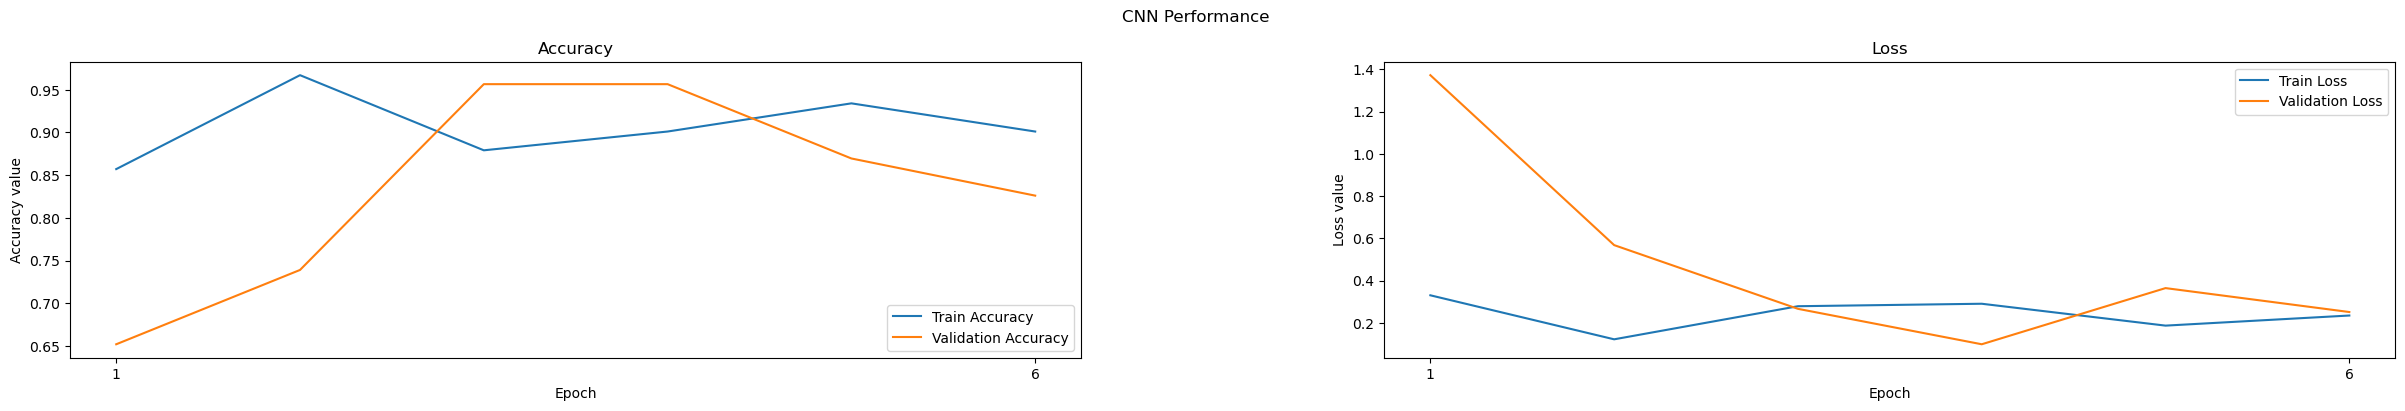

In [132]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(30,4))
t=f.suptitle('CNN Performance',fontsize=12)
f.subplots_adjust(top=0.85,wspace=0.3)
max_epoch=len(history.history['accuracy']) + 1
epoch_list=list(range(1,max_epoch))
ax1.plot(epoch_list,history.history['accuracy'],label='Train Accuracy')
ax1.plot(epoch_list,history.history['val_accuracy'],label='Validation Accuracy')
ax1.set_xticks(np.arange(1,max_epoch,5))
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy value')
ax1.set_title('Accuracy')
l1=ax1.legend(loc='best')


ax2.plot(epoch_list,history.history['loss'],label='Train Loss')
ax2.plot(epoch_list,history.history['val_loss'],label='Validation Loss')
ax2.set_xticks(np.arange(1,max_epoch,5))
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss value')
ax2.set_title('Loss')
l2=ax2.legend(loc='best')

In [133]:
model.save('phase_classification_sheffield_27_2_23_.h5')

In [134]:
from keras.models import load_model

In [135]:
import tensorflow as tf

In [149]:
class_names=('Homogeneous','Phase separated')

In [150]:
from sklearn.metrics import roc_curve

In [151]:
import numpy as np
import cv2
from keras.models import load_model

# Load a pre-trained model
model = load_model('phase_classification_sheffield_27_2_23_.h5')

In [152]:
from sklearn.metrics import confusion_matrix
y_test=np.argmax(y_test,axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [153]:
y_pred = model.predict(np.array(X_test))
y_pred = np.argmax(y_pred, axis=1)

In [154]:
conf_mat = confusion_matrix(y_test, y_pred,labels=None, sample_weight=None, normalize=None)

In [155]:
conf_mat

array([[ 9,  3],
       [ 0, 17]], dtype=int64)

In [156]:
print(conf_mat)

[[ 9  3]
 [ 0 17]]


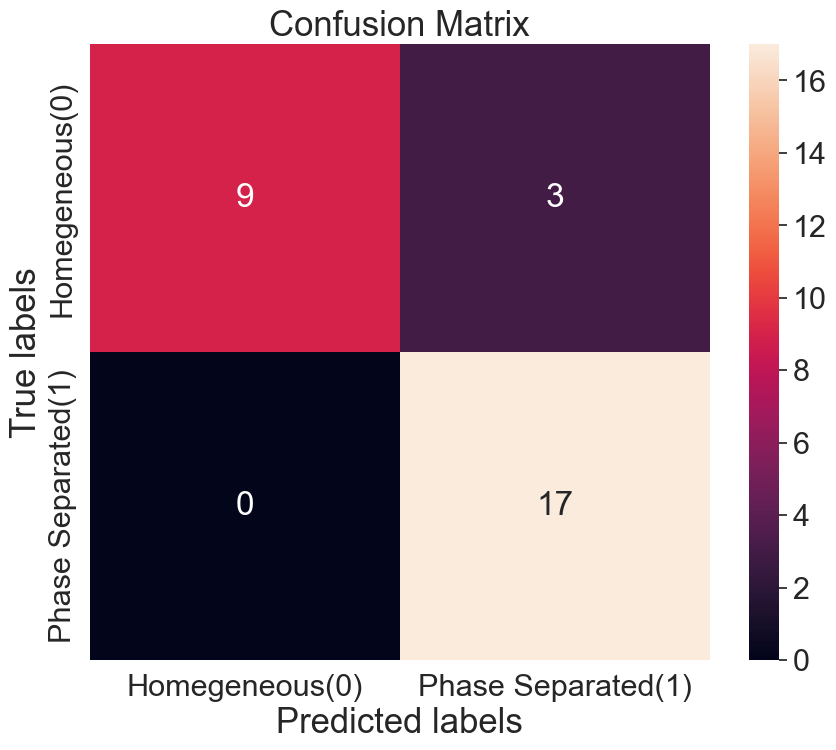

In [167]:
import seaborn as sns
from matplotlib import pyplot as plt
conf_mat = confusion_matrix(y_test, y_pred,labels=None, sample_weight=None, normalize=None)

plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.set(font_scale=2.0)
sns.heatmap(conf_mat, annot=True, fmt='d')

ax.set_xlabel('Predicted labels',fontsize=25);ax.set_ylabel('True labels',fontsize=25); 
ax.set_title('Confusion Matrix',fontsize=25); 
ax.tick_params(axis='both', which='major', labelsize=22)

ax.xaxis.set_ticklabels(['Homegeneous(0)', 'Phase Separated(1)']); ax.yaxis.set_ticklabels(['Homegeneous(0)', 'Phase Separated(1)']);

In [145]:
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

NameError: name 'tpr' is not defined

In [146]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [147]:
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro"))

0.888030888030888
0.925
0.875


In [124]:
y_test

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [125]:
len(y_test)

58

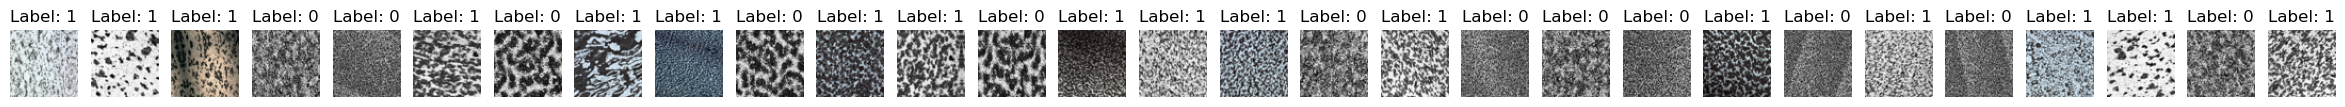

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# assuming X_test is a numpy array of image data with shape (num_images, height, width, num_channels)
num_images = 29
indices = np.random.choice(len(X_test), size=num_images, replace=False)

# create a plot with subplots for each image
fig, ax = plt.subplots(1, num_images, figsize=(30, 7))

# plot each image on its own subplot
for i in range(num_images):
    img = X_test[indices[i]]
    label = y_test[indices[i]]
    ax[i].imshow(img)
    ax[i].axis('off')
    ax[i].set_title("Label: {}".format(label))

# display the plot
plt.show()

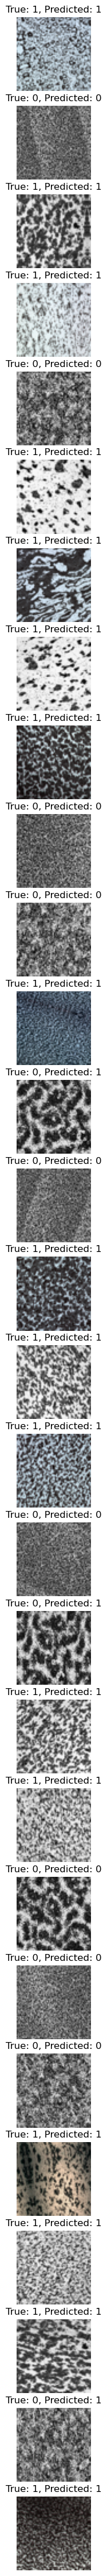

In [148]:
import matplotlib.pyplot as plt

# assuming y_test and y_pred are numpy arrays of labels with shape (num_images,)
# and X_test is a numpy array of image data with shape (num_images, height, width, num_channels)
num_images = y_test.shape[0]

# create a plot with subplots for each image
fig, ax = plt.subplots(num_images, 1, figsize=(10, 2*num_images))

# loop through the images and display them with their true and predicted labels
for i in range(num_images):
    # get the true and predicted labels for this image
    true_label = y_test[i]
    pred_label = y_pred[i]
    
    # get the image data and display it on the subplot
    img = X_test[i]
    ax[i].imshow(img)
    ax[i].axis('off')
    
    # add the true and predicted labels as a title to the subplot
    title = f'True: {true_label}, Predicted: {pred_label}'
    ax[i].set_title(title)

# display the plot
plt.show()
